# Instructions
[GEOG INSTRUCTION LINK](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/death.html)

Imagine that you are an epidemiologist looking back at the Black Death outbreak in [1665](https://en.wikipedia.org/wiki/Great_Plague_of_London). You want to calculate the total deaths from the disease using historical figures of rat populations (recorded by the local rat catchers) and the population density (derived from the parish records).

You know from small scale studies that the relationship between <b>average rats caught per week per 100m x 100m square <i>(r)</i></b>, <b>average population density per 100m x 100m square<i>(p)</i></b> and <b>average deaths per week per 100m x 100m square<i>(d)</i></b> is...

<b>d = (0.8 x r) x (1.3 x p)</b>

You have files containing a raster map of average population densities per 100m x 100m square for 16 square parishes in London. You also have an area map of average rats caught per week per 100m x 100m square for each rat catcher's area of work. These are stored as text digits. One value represents a 100m x 100m square area, but <b>the figures are averaged at the Parish or Rat Catcher area scale</b> and then smoothly distributed between the appropriate individual areas.

## Instructions
Write a Jupyter Notebook that does the following.
<ol>
<li> [X] Pulls in the two maps and puts them on the screen. Each pixel will represent a 100m x 100m square area.</li>
<li> [X] Calculates a map showing average deaths per 100m x 100m square area for the different geographical regions produced by the intersection of the two images.</li>
I.e. run through the maps and pull out the values for each pair of equivalently positioned cells. Put them through the equation above to produce a two dimensional array of absolute deaths that you can convert into an Image mapping the deaths.
<li> [X] Displays the three maps.</li>
<li> [X] Saves the death map as a text file of absolute deaths. Each line should equal a line on the map.</li>
<li> [X] Displays the total deaths per week.</li>
<li> [X] Allows the user to change the parameter weights for the equation (for example with a scrollbar).</li>
</ol>

## Files for this project.

<b>2 x (400 by 400) raster maps</b> with blocks of <b>consistant average values</b> in them. One represents average rats caught for that area per and the other represents the average population density for the area.

[death.parishes](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/death.parishes) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/deathparishes.gif) for comparison - this should not be used in the project.)

[death.rats](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/death.rats) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/deathrats.gif) for comparison - this should not be used in the project.)

The blocks are not the same in the two files. One represents parishes, the other the domains of the rat catchers. The information for both are stored as text numbers. <b>Each number represents a 100 x 100m area</b>. The values are laid out from the upper left to lower right of the raster image, with each line being a line of the rasters.

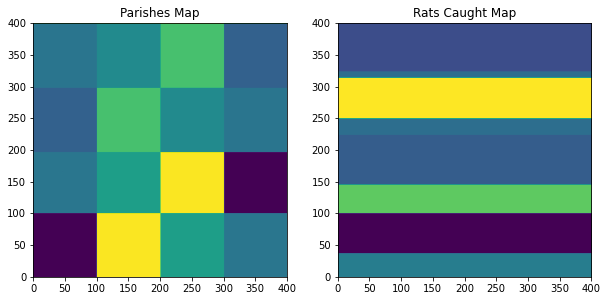

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='r_weight', max=10.0, step=0…

In [ ]:
# Import modules
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import ipywidgets

# Model variables
parishes = []
rats =[]
# fig = plt.add_subplot()

### Read Maps ###
# Read parishes map
with open('parishes.txt', newline='') as f1:
    parishes_r = csv.reader(f1, quoting=csv.QUOTE_NONNUMERIC)
    for row in parishes_r:
        p_row_list = []
        for value in row:
            p_row_list.append(value)
        parishes.append(p_row_list)
# Read rats map
with open('rats.txt', newline='') as f2:
    rats_r = csv.reader(f2, quoting=csv.QUOTE_NONNUMERIC)
    for row in rats_r:
        r_row_list = []
        for value in row:
            r_row_list.append(value)
        rats.append(r_row_list)

# Display maps
f, ax = plt.subplots(1,2, figsize=(10, 10))
ax[0].set_ylim(0, 400)
ax[0].set_xlim(0, 400)
ax[0].set_title('Parishes Map')
ax[0].imshow(parishes);
ax[1].set_ylim(0, 400)
ax[1].set_xlim(0, 400)
ax[1].set_title('Rats Caught Map')
ax[1].imshow(rats);
plt.show()

def death_d(r_weight = 0.8, p_weight = 1.3):
    """
    Generates the death map by utilising the equation d = (0.8 x r) x (1.3 x p).
    Each pixel in the map represents an area of 100mX100m squae area.
    r = average rats caught per week per 100m x 100m square.
    p = average population density per 100m x 100m square.
    d = average deaths per week per 100m x 100m square.
    """

    # Death calculation
    p = [[j*p_weight for j in i] for i in parishes]
    # print(p)
    r = [[j*r_weight for j in i] for i in rats]
    # print(r)       
    # print((len(p)),(len(p[0])),(len(r)),(len(r[0])))
    # Multiplying 2d lists
    d = []
    for i in range(len(p)):
        a = []
        for j in range (len(p[0])):
            b = p[i][j] * r[i][j]
    #         print('b', b)
            a.append(b)
    #         print('a', a)
        d.append(a)
    # print('Death', death)
    # print(len(death))
    # print(len(death[0]))
    
    # Save map as death.txt file
    with open('death.txt', 'w', newline='') as f3:     
       death_w = csv.writer(f3)     
       for row in d:         
            death_w.writerow(row)
    
    # Read the saved death file as death2
    d2 = []
    with open('death.txt', newline='') as f4:
        death_r = csv.reader(f4, quoting=csv.QUOTE_NONNUMERIC)
        for row in death_r:
            death2 = []
            for value in row:
                death2.append(value)
            d2.append(d2)
    # Validate d2
    # print(len(d2), len(d2[0]))
    # d == d2 # Should return true if same

    # Display total death/week
    total_death = 0
    for i in range(len(d)):
        for j in range(len(d[i])):
            total_death += d[i][j]
#     print('Total', '%.2f' %total_death, 'deaths per week') # Display upto 2 decimal points.
    tdi = "{:,}".format(int(total_death))
    print('Total', tdi, 'deaths per week') # Display as integer.
    
    # Show death map
    f, ax = plt.subplots(1, figsize=(5, 5));
    ax.set_title('Death Map')
    ax.set_ylim(0, 400)
    ax.set_xlim(0, 400)
    ax.imshow(d);
    plt.show()
    
    # Print Death-2 Map. Updates automatically as well.
    f, ax = plt.subplots(1, figsize=(5, 5));
    ax.set_title('Death Map 2')
    ax.set_ylim(0, 400)
    ax.set_xlim(0, 400)
    ax.imshow(d2);
    plt.show()

    
#     # Display total death/week for death-2. Updates automatically as well.
#     total_death2 = 0
#     for i in range(len(d2)):
#         for j in range(len(d2[i])):
#             total_death2 += d2[i][j]
#     print(total_death2, 'deaths 2 per week')
    
# Display scrollbars. Continous update disabled. 
# ipywidgets.widgets.interact_manual.opts['manual_name'] = 'Calculate'
ipywidgets.widgets.interact(death_d, 
                            r_weight = ipywidgets.widgets.FloatSlider(min=0.0, max=10.0, step=0.01, value=0.8, continuous_update=False), 
                            p_weight = ipywidgets.widgets.FloatSlider(min=0.0, max=10.0, step=0.01, value=1.3, continuous_update=False));
